In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smooth
import math
import time

import cv2

import random
from IPython import display
from math import dist

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8, n_col =1,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False,ncol=n_col)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [3]:

# 滑鼠互動 function
def callback(event, x, y, flags, param):
    global point_location, backup, number_of_point, total_potint
    #按下左鍵時新增位置
    if event == cv2.EVENT_LBUTTONDOWN:
        backup = number_of_point
        point_location[number_of_point] = (x, y)
        number_of_point = number_of_point + 1
        total_potint = total_potint + 1

    #按下右鍵時刪除現在的點
    if event == cv2.EVENT_RBUTTONDOWN and number_of_point > 0:
        point_location.pop(backup)
        backup = backup - 1
        number_of_point = number_of_point - 1
        total_potint = total_potint + 1

# input the figure for calibration distance for pixel

In [4]:
img = cv2.imread('20220324-145612-590.jpg')

In [ ]:
# 校正DP ratio

# 初始化參數 如果想保留的話把下面這段移到另一個block
point_location = {} #記錄位置
backup = 0          # 用在第一個點跟備用
number_of_point = 0 # 點的數量
total_potint = 0    # 所有點的數量(包含刪除過的)
display_setting = 0 # 顯示設定


cv2.namedWindow("img", cv2.WINDOW_NORMAL) #視窗名稱
#cv2.imshow("img", img) 
#cv2.imshow("img", img)  #顯示出來
cv2.setMouseCallback('img',callback)
#cap = cv2.imread('Beam_profile.jpg') #影像抓取
#cv2.namedWindow("img", cv2.WINDOW_NORMAL) #視窗名稱
#cv2.setMouseCallback("img", callback) # 建立function
print(">>> Start !!")
while True:
    cv2.imshow("img", img)  #顯示出來
    #ret, frame = cap.read() #讀影像

    #互動有關的都要放在這一層，改變數來顯示這裡的設定
    #每一個點的時候標記
    if number_of_point >= 1:
        cv2.drawMarker(img, point_location[backup], (0, 255, 255), markerType=cv2.MARKER_CROSS, markerSize=15)
    #兩點間畫線
    if number_of_point >= 2:
        for i in range(1, number_of_point):
            cv2.line(img, point_location[i - 1], point_location[i], (0, 255, 255), 1)
    #顯示最近兩點間的距離
    if display_setting >= 1:
        display_text = str(round(Calculated_distance,2)) # 到小數點第二位
        for i, line in enumerate(display_text.split('\n')): # 如果太長就換行
            cv2.putText(img, line, np.asarray(point_location[number_of_point-1])+[-50,50], cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 255), 2,cv2.LINE_AA) 
    
    

    wait_key = cv2.waitKey(1) #等待指令 

    # "Esc" : exit 
    if wait_key == 27:
        print(">>> Exit")
        break
    # "r": clear the marker on the screen
    elif wait_key == ord("r"):
        print(">>> Clear Coordinates.")
        point_location.clear()
        backup = 0
        number_of_point = 0
        display_setting = 0
    # "c": calculate the distance between the two points
    elif wait_key == ord("c") and number_of_point >= 2:
        #print(number_of_point,point_location)
        prev_point = np.asarray(point_location[number_of_point - 2])
        #print('prev',prev_point)
        now_point = np.asarray(point_location[number_of_point-1])
        #print('now',now_point)
        Calculated_distance= dist(prev_point,now_point)
        
        print('measured pixel',Calculated_distance)
        display_setting=1
    # "s": Save the image
    elif wait_key == ord("s"):
        print('>>> Save Image and Coordinates at', 'Save_image_path')
        #str = "painted{no:03}.png".format(no = p)
        #cv2.imwrite(str, frame)
        Save_image_path= 'Calibration_image/Cali_image'+str(time.strftime('%Y%m%d_%H%M%S', time.localtime()))+'.png'

        cv2.imwrite(Save_image_path,img)#儲存路徑
        #with open("painted.json","w") as f:
        #    json.dump(pt, f, indent = 4)

#cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1) # 要加這行才會關掉

>>> Start !!
measured pixel 109.0
>>> Exit


-1

In [5]:
print('Please key in the measured distance in mm :')
Real_distance = float(input()) 
DP_ratio = Real_distance/Calculated_distance
print('one pixel equals to', DP_ratio, 'mm' )

Please key in the measured distance in mm :
one pixel equals to 0.05289154758526454 mm


# Input the DP ratio

In [5]:
DP_ratio =0.1076
DP_ratio = 0.088396


In [137]:
#img = cv2.imread('20220324-145719-268.jpg')#15
#img = cv2.imread('20220324-145612-590.jpg')  #12
#img = cv2.imread('20220324-145558-163.jpg') #1

img = cv2.imread('20241018-103035-959.jpg') 
DP_ratio =0.1076
img = cv2.imread('20241018-110600-877.jpg') 
DP_ratio = 0.088396
#img = cv2.imread('20241018-102840-526.jpg') 


# ratio = 0.008408
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


print(gray_img)
print(gray_img.shape)

#cv2.imshow("gray_img", gray_img)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1200, 1600)


# Find the center of the beam 

Center point:  414 888


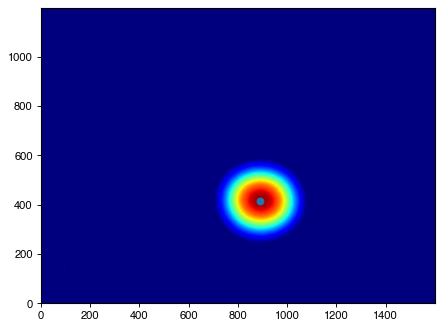

In [138]:
M_center= cv2.moments(gray_img) #求矩
cx_center = int(M_center['m01']/M_center['m00']) # 求y座標
cy_center = int(M_center['m10']/M_center['m00']) # 求x座標
print('Center point: ', cx_center,cy_center)
imgplot_center = plt.imshow(gray_img[:,:], cmap='jet', aspect=1,origin='lower')
plot_cx_center = int(cx_center)
plot_cy_center = int(cy_center)
plt.scatter(plot_cy_center,plot_cx_center)

# Select the beam profile region

In [139]:
# set the range 
half_width = 200
gray_img2= gray_img.copy()
# clip
img_matrix = gray_img2[plot_cx_center-half_width:plot_cx_center+half_width,
                      plot_cy_center-half_width:plot_cy_center+half_width]
print(img_matrix.shape)

# filter noise
Noise_threshold = 0

img_matrix[img_matrix<Noise_threshold]=0



(400, 400)


# Beam profile (after clip)

(400, 400)


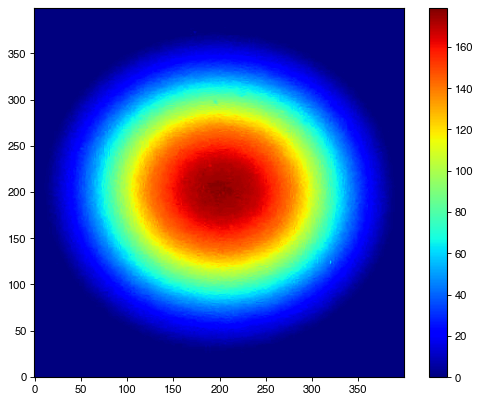

In [140]:
fig = plt.figure(figsize=(8,6))        # 圖片大小

#img_matrix = gray_img[400:800,600:1200]
#img_matrix = img_matrix.astype(float)

#imgplot = 
plt.imshow(img_matrix[:,:], cmap='jet', aspect=1,origin='lower')
plt.colorbar()
print(img_matrix.shape)

#plt.savefig('colorbar.svg', format="svg")

# Find the center of the beam profile (after clip)

Center point:  200 200


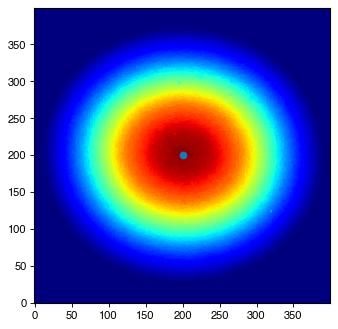

In [141]:
# 計算重心位置
M= cv2.moments(img_matrix) #求矩
cx = int(M['m01']/M['m00']) # 求y座標
cy = int(M['m10']/M['m00']) # 求x座標
print('Center point: ', cx,cy)

# 轉化成整數 才可以指定
plot_cx = int(cy)
plot_cy = int(cx)

# 如果射束形狀很醜，導致重心位置與實際中心差太遠，改用下面兩行指定
plot_cx = int(cy)
#plot_cy = int(cx)

# 繪圖
imgplot = plt.imshow(img_matrix[:,:], cmap='jet', aspect=1,origin='lower')
plt.scatter(plot_cx,plot_cy)

#矩陣的x(第一個值) 是垂直方向 矩陣的y(第二個值) 是水平方向
#plot是參照原本的plot 第一個值是x 是水平 




6938339
=================== 5 mm ====================
Number of pixels in 5 mm:    28   ,    28.281822706909814
Avergage:    172.352  standard deviation:   2.59  Fluctuation:    1.503 %
Center 5 mm * 5 mm area ratio:  0.078  point_5mm:  (172, 228, 172, 228)
Current per area ratio:    0.312
=================== 10 mm ====================
Number of pixels in 10 mm:    56   ,    56.56364541381963
Avergage:    160.472  standard deviation:   10.365  Fluctuation:    6.459 %
Center 10 mm * 10 mm area ratio:  0.29  point_10mm:  (144, 256, 144, 256)
Current per area ratio:    0.29


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_82692/3760332279.py:9: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')


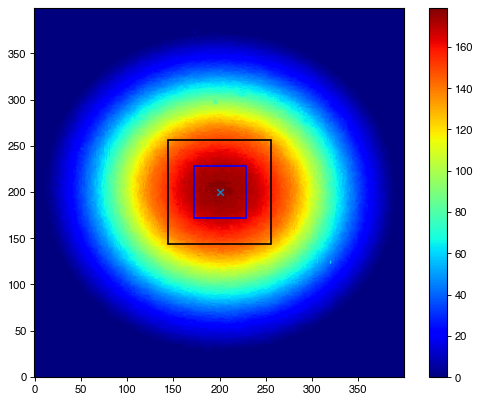

In [142]:
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
total_counts = img_matrix.sum()
print(total_counts)


plt.imshow(img_matrix, cmap='jet', aspect=1,origin='lower')
plt.colorbar()
plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')


#======================================================
# Area of 5 mm
#======================================================
print('=================== 5 mm ====================')
#width = 5 mm
N_of_pixels_5mm = int(2.5/DP_ratio) # half width
print('Number of pixels in 5 mm:   ', N_of_pixels_5mm,'  ,   ', (2.5/DP_ratio))

point_5mm = (cx-1*N_of_pixels_5mm,
             cx+1*N_of_pixels_5mm,
             cy-1*N_of_pixels_5mm,
             cy+1*N_of_pixels_5mm)

Center_area_5mm = img_matrix[point_5mm[0]:point_5mm[1],point_5mm[2]:point_5mm[3]].sum()
current_per_area_ratio_5mm = (Center_area_5mm/total_counts)/(0.5**2)

avg = np.average(img_matrix[point_5mm[0]:point_5mm[1],point_5mm[2]:point_5mm[3]])
std = img_matrix[point_5mm[0]:point_5mm[1],point_5mm[2]:point_5mm[3]].std()
print('Avergage:   ', np.round(avg,3), 
      " standard deviation:  ", np.round(std,3),
      " Fluctuation:   ", np.round((100*std/avg),3),'%')
print('Center 5 mm * 5 mm area ratio: ', np.round((Center_area_5mm/total_counts),3),' point_5mm: ',point_5mm)
print('Current per area ratio:   ', np.round((current_per_area_ratio_5mm),3))

rect_1 = plt.Rectangle((plot_cx-1*N_of_pixels_5mm,plot_cy-1*N_of_pixels_5mm),2*N_of_pixels_5mm,2*N_of_pixels_5mm,linewidth = 1.5,facecolor= 'None',edgecolor='blue')
ax.add_patch(rect_1)

#======================================================
# Area of 10 mm
#======================================================
print('=================== 10 mm ====================')

#width = 10 mm 
N_of_pixels_10mm = int(5/DP_ratio) # half width so it's 5.
print('Number of pixels in 10 mm:   ', N_of_pixels_10mm,'  ,   ', (5/DP_ratio))

point_10mm = (cx-1*N_of_pixels_10mm,
              cx+1*N_of_pixels_10mm,
              cy-1*N_of_pixels_10mm,
              cy+1*N_of_pixels_10mm)

Center_area_10mm = img_matrix[point_10mm[0]:point_10mm[1],point_10mm[2]:point_10mm[3]].sum()
current_per_area_ratio_10mm = (Center_area_10mm/total_counts)/(1**2)

avg = np.average(img_matrix[point_10mm[0]:point_10mm[1],point_10mm[2]:point_10mm[3]])
std = img_matrix[point_10mm[0]:point_10mm[1],point_10mm[2]:point_10mm[3]].std()
print('Avergage:   ', np.round(avg,3), 
      " standard deviation:  ", np.round(std,3),
      " Fluctuation:   ", np.round((100*std/avg),3),'%')
print('Center 10 mm * 10 mm area ratio: ', np.round((Center_area_10mm/total_counts),3),' point_10mm: ',point_10mm)
print('Current per area ratio:   ', np.round((current_per_area_ratio_10mm),3))





rect_2 = plt.Rectangle((plot_cx-1*N_of_pixels_10mm,plot_cy-1*N_of_pixels_10mm),2*N_of_pixels_10mm,2*N_of_pixels_10mm,linewidth = 1.5,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_2)




#avg = np.average(img_matrix[point_1[0]:point_1[1],point_1[2]:point_1[3]])
#std = img_matrix[point_1[0]:point_1[1],point_1[2]:point_1[3]].std()
#print(avg," ", std)
#print(100*(std/avg))
#
#
#rect_1 = plt.Rectangle((plot_cx-1*ROI_half_len_array,plot_cy-1*ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
#ax.add_patch(rect_1)
#
#
#ax.set_xlabel('x position (mm)',fontsize=18)
#ax.set_ylabel('y position (mm)',fontsize=18)

# Calculate the require current

In [143]:
Current_required = 180
print("In 5 mm * 5mm area:   ", current*())


NameError: name 'current' is not defined

In [144]:
from scipy.optimize import curve_fit,fmin
from scipy.optimize import least_squares

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

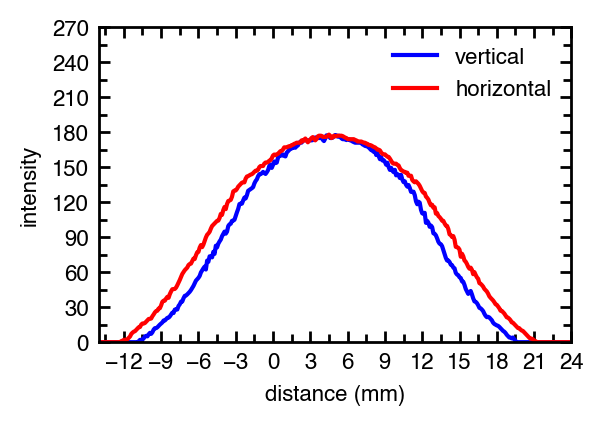

In [145]:
fig = fig_pre_def(6,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

img_vy = img_matrix[0:500,cy]
img_vx = (np.arange(0,len(img_vy),1)-(cx-50))*(DP_ratio)
img_hy = img_matrix[cx,0:500]
img_hx = (np.arange(0,len(img_vy),1)-(cy-50))*(DP_ratio)



axis_x = np.arange(-30,40,0.1)
pro_vy = interpolation_function(img_vx,img_vy,axis_x)
pro_hy = interpolation_function(img_hx,img_hy,axis_x)


ax.plot(axis_x,pro_vy,'b',label = 'vertical')
ax.plot(axis_x,pro_hy,'r',label = 'horizontal')


#gauss_para = gauss_fit_wo_baseline(axis_x[75:180],pro_y[75:180])
#gauss_v =gauss_wo_baseline(axis_x,gauss_para[0],gauss_para[1],gauss_para[2])
#ax.plot(axis_x,gauss_v,'r',label = 'Gaussian fitting')

fig_post_def(xlabel="distance (mm)",ylabel="intensity",
             xlim=(-14,24),ylim=(0,270),
             lg_fs=8
             ,xticks=(3,1.5),yticks=(30,15))
#ax.get_legend().remove()
#plt.savefig('/Users/thlin/Library/CloudStorage/Dropbox/計畫 Project/2022 原子能科技學術合作計畫 質子診斷/結案報告/figure/beam profile horizontal_vertical.svg', format="svg")


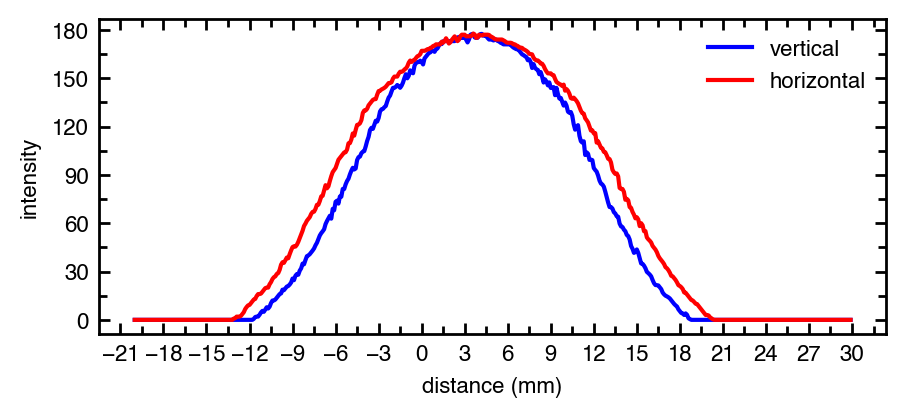

In [123]:
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

img_vy = img_matrix[0:400,cy]
img_vx = (np.arange(0,len(img_vy),1)-(cx-40))*(DP_ratio)
img_hy = img_matrix[cx,0:400]
img_hx = (np.arange(0,len(img_vy),1)-(cy-40))*(DP_ratio)



axis_x = np.arange(-20,30,0.1)
pro_vy = interpolation_function(img_vx,img_vy,axis_x)
pro_hy = interpolation_function(img_hx,img_hy,axis_x)


ax.plot(axis_x,pro_vy,'b',label = 'vertical')
ax.plot(axis_x,pro_hy,'r',label = 'horizontal')


#gauss_para = gauss_fit_wo_baseline(axis_x[75:180],pro_y[75:180])
#gauss_v =gauss_wo_baseline(axis_x,gauss_para[0],gauss_para[1],gauss_para[2])
#ax.plot(axis_x,gauss_v,'r',label = 'Gaussian fitting')

fig_post_def(xlabel="distance (mm)",ylabel="intensity",
             #,xlim=(-12,12),ylim=(0,180),
             lg_fs=8
             ,xticks=(3,1.5),yticks=(30,15))
#ax.get_legend().remove()
#plt.savefig('/Users/thlin/Library/CloudStorage/Dropbox/計畫 Project/2022 原子能科技學術合作計畫 質子診斷/結案報告/figure/beam profile horizontal_vertical.svg', format="svg")


187.0702165848723 212.25706160066298


<Figure size 629.921x472.441 with 0 Axes>

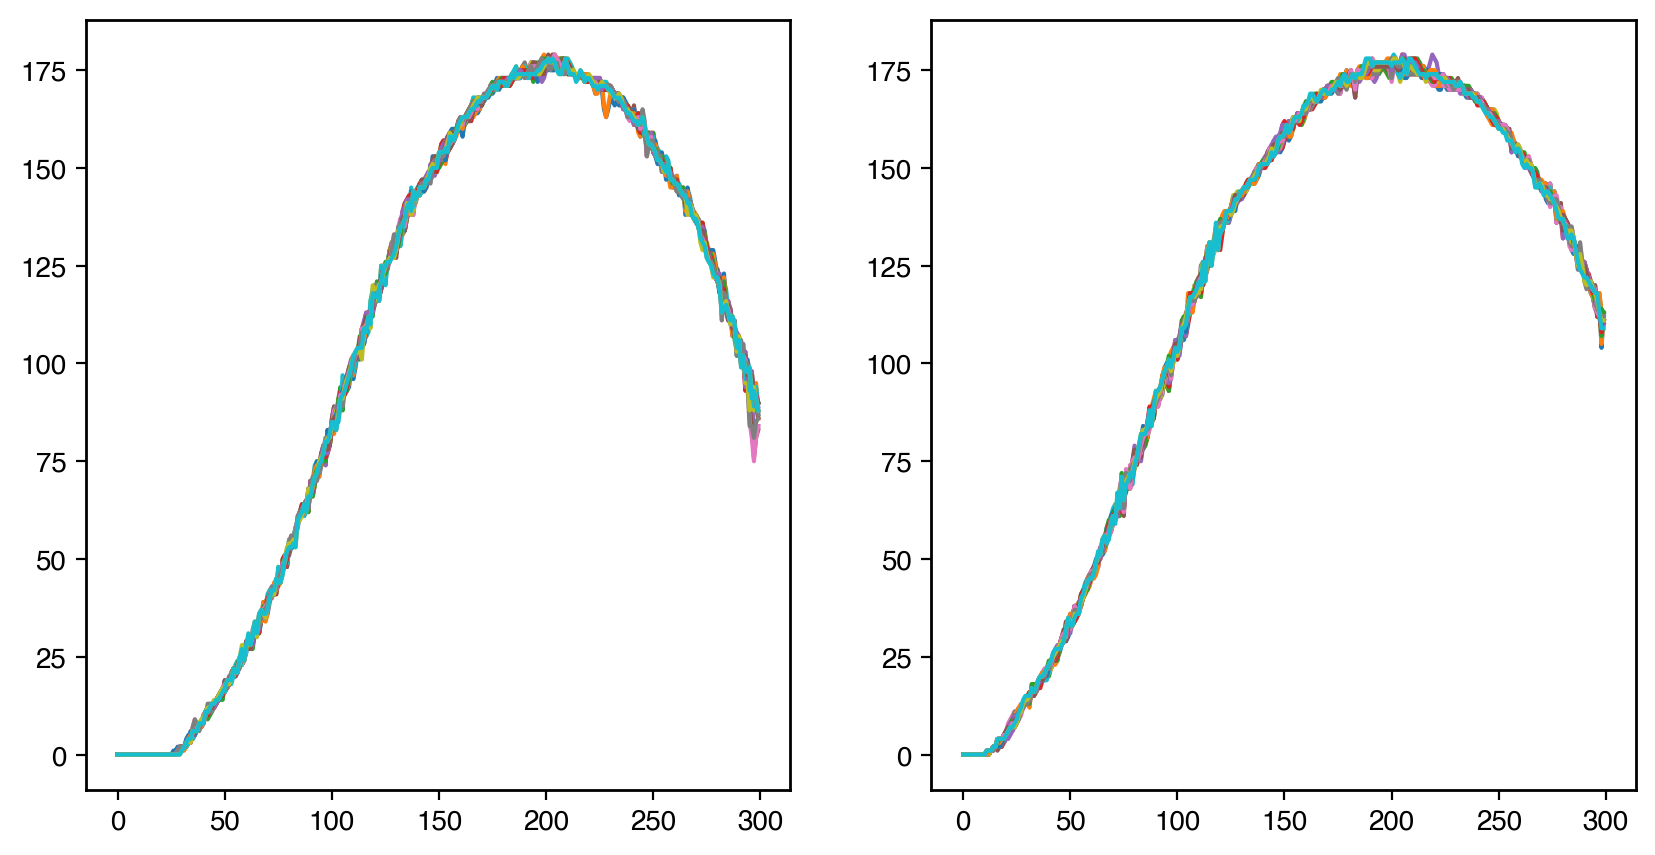

In [124]:
#print(img_matrix[50:250,cy])
fig_pre_def()

fig = plt.figure(figsize=(10,5))        # 圖片大小
ax1 = fig.add_subplot(1, 2, 1)          # 產生1x1格圖片、在第一格

ax2 = fig.add_subplot(1, 2, 2)          

for i in range(-10,10,1):
    ax1.plot(img_matrix[0:300,cy+i])
    ax2.plot(img_matrix[cx+i,0:300])
    
gausss_v = gauss_fit_wo_baseline(np.arange(0,len(img_matrix[0:300,cy]),1),img_matrix[0:300,cy])
gausss_h = gauss_fit_wo_baseline(np.arange(0,len(img_matrix[0:300,cy]),1),img_matrix[cx,0:300])
print(2.355*gausss_v[2],2.355*gausss_h[2])


In [125]:
i=0
x_axis = np.arange(0,len(img_matrix[cx+i,0:300]),1)
horiz_gaussian_parameters= gauss_fit_wo_baseline(x_axis,img_matrix[cx+i,0:300])
print(horiz_gaussian_parameters)
vertical_gaussian_parameters= gauss_fit_wo_baseline(x_axis,img_matrix[0:300,cy+i])
print(vertical_gaussian_parameters)

horizontal_sigma = DP_ratio*horiz_gaussian_parameters[2]
vertical_sigma = DP_ratio*vertical_gaussian_parameters[2]

print("horizontal_sigma: ", horizontal_sigma)
print("vertical_gaussian_parameters: ", vertical_sigma)

print("horizontal FWHM: ", 2.355*horizontal_sigma)
print("vertical_gaussian FWHM: ", 2.355*vertical_sigma)

[185.02997195 203.44438663  90.13038709]
[184.17315898 203.54311391  79.43533613]
horizontal_sigma:  7.967165697347008
vertical_gaussian_parameters:  7.021765972499521
horizontal FWHM:  18.762675217252205
vertical_gaussian FWHM:  16.536258865236373


(300, 300)


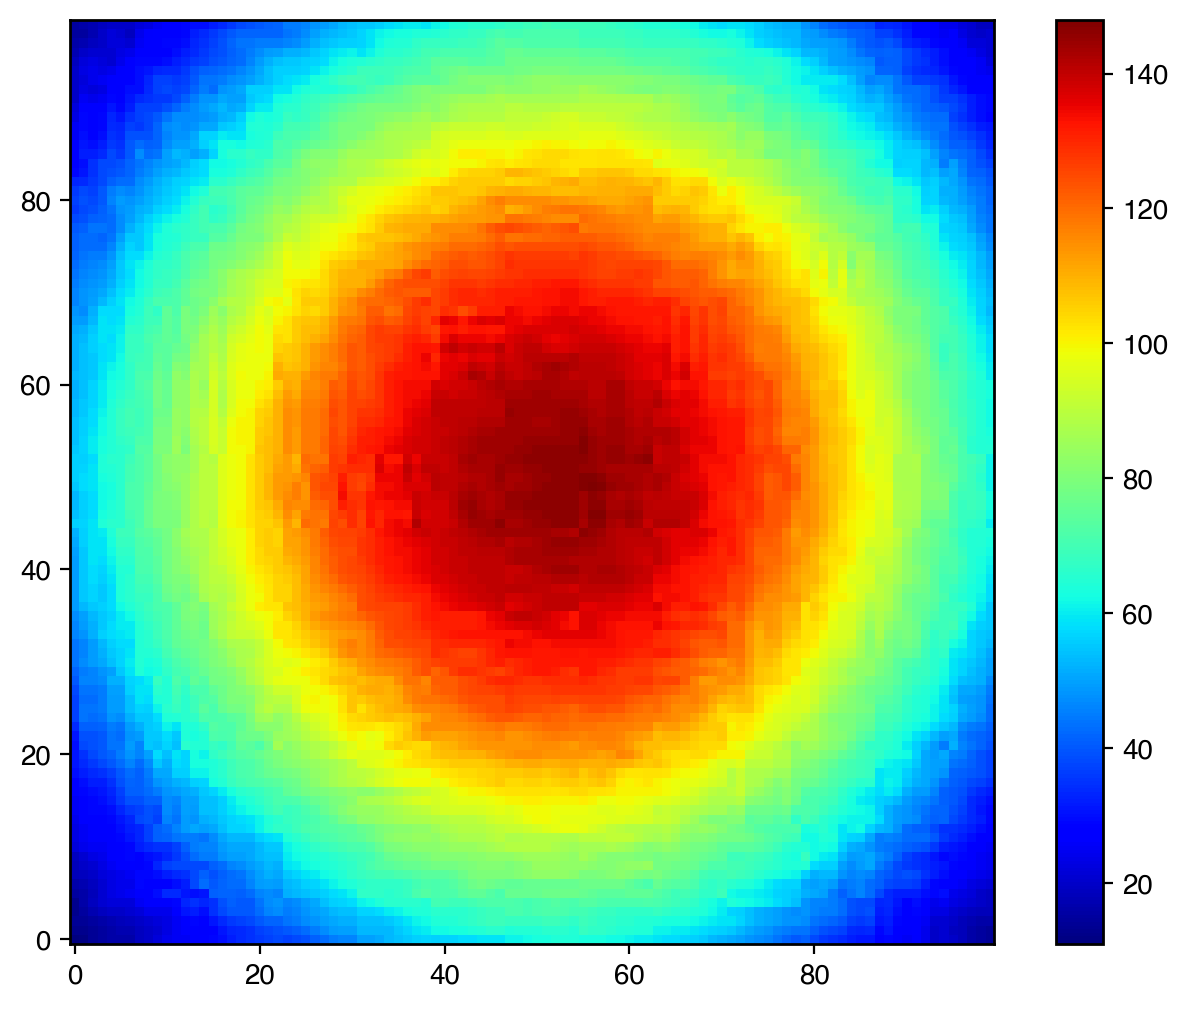

In [96]:
fig = plt.figure(figsize=(8,6))        # 圖片大小

#img_matrix = gray_img[400:800,600:1200]
#img_matrix = img_matrix.astype(np.float)
pixel_range= 50
#img_matrix[img_matrix==0]=np.nan
imgplot = plt.imshow(img_matrix[cx-pixel_range:cx+pixel_range,cy-pixel_range:cy+pixel_range],cmap='jet', aspect=1,origin='lower')
plt.colorbar()
print(img_matrix.shape)

#plt.savefig('colorbar.svg', format="svg")

In [97]:
ROI_half_len = 1.25 #mm 
ROI_half_len_array = int(ROI_half_len / DP_ratio)
print(ROI_half_len_array)


10


In [98]:
img_matrix[img_matrix<2]=np.nan

nan


TypeError: fig_post_def() got an unexpected keyword argument 'x_ma'

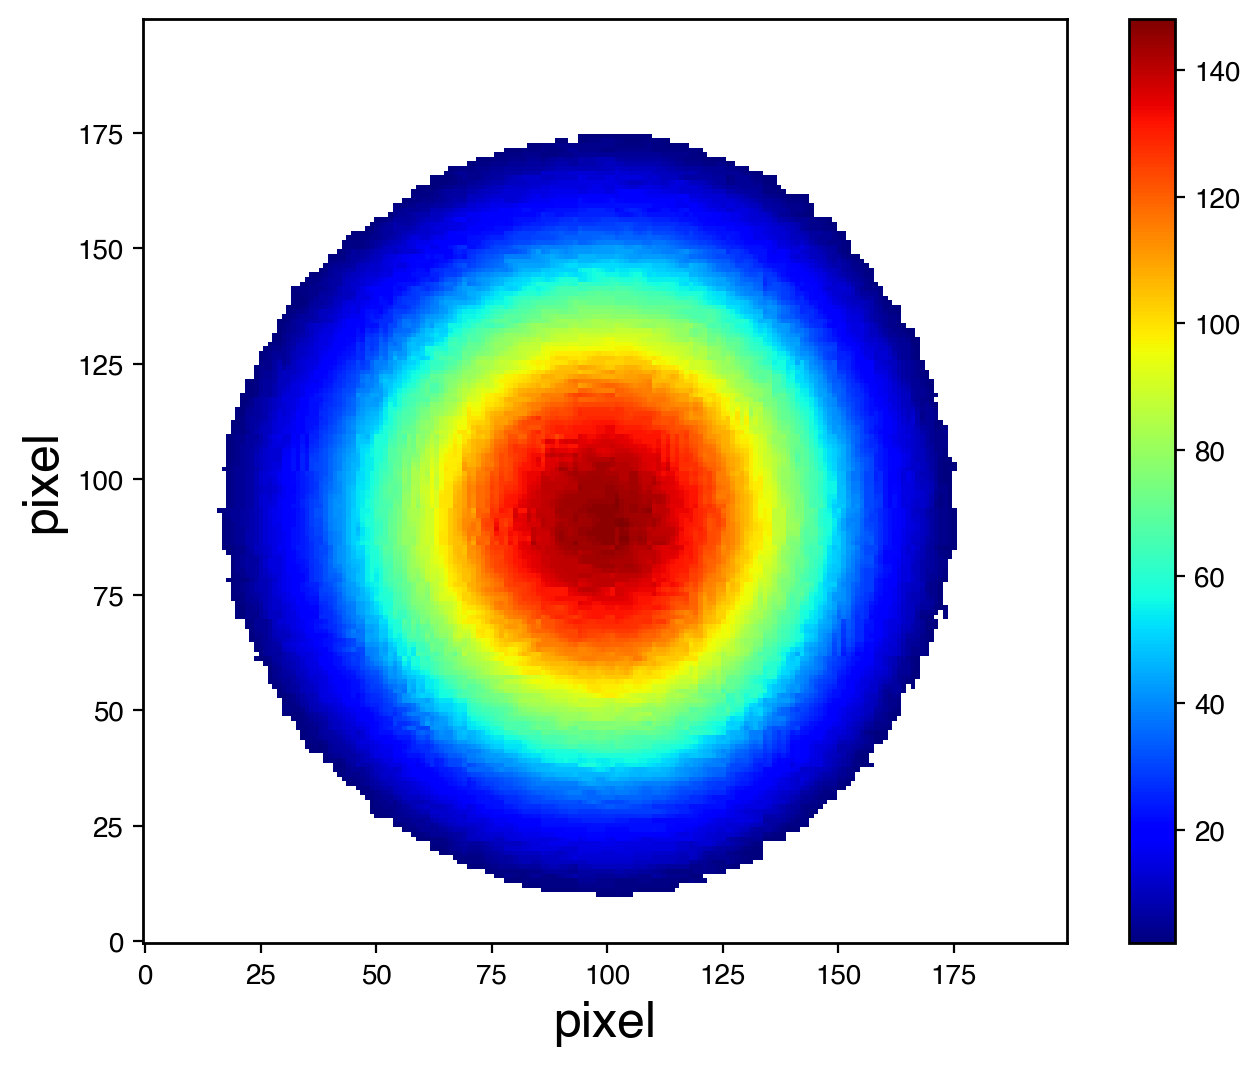

In [99]:
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
total_counts = img_matrix.sum()
print(total_counts)
#img_matrix[img_matrix==0]=np.nan
plt.imshow(img_matrix[50:250,50:250], cmap='jet', aspect=1,origin='lower',vmin=2)
plt.colorbar()
#plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')
plt.xlabel("pixel",fontsize=18)
plt.ylabel("pixel",fontsize=18)
fig_post_def(xlabel="pixel",ylabel="pixel",xlim=(0,200),ylim=(0,200),
            x_ma=50,x_mi=10,
            y_ma=50,y_mi=10)
ax.get_legend().remove()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


nan


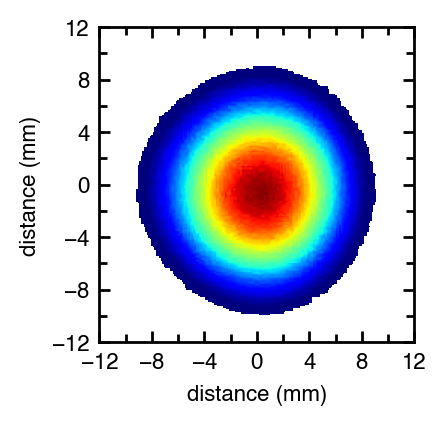

In [103]:
fig = fig_pre_def(6,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
total_counts = img_matrix.sum()
print(total_counts)
#img_matrix[img_matrix==0]=np.nan
plt.imshow(img_matrix[30:230,30:230], cmap='jet', aspect=1,origin='lower',vmin=10
           ,extent=[(0-cy+30)*DP_ratio,(200-cy+30)*DP_ratio,(0-cy+30)*DP_ratio,(200-cy+30)*DP_ratio])

#ticks = np.arange(0,25,5)
#plt.xticks(ticks)
#plt.yticks(ticks)
#plt.colorbar()
#plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')
fig_post_def(xlabel="distance (mm)",ylabel="distance (mm)",xlim=(-12,12),ylim=(-12,12),
             lg_fs=8,xticks=(4,2),yticks=(4,2))
#ax.get_legend().remove()
plt.savefig('/Users/thlin/Library/CloudStorage/Dropbox/計畫 Project/2022 原子能科技學術合作計畫 質子診斷/結案報告/figure/2D beam profile.svg', format="svg")


In [ ]:
#print(img_matrix[50:250,cy])
fig_pre_def()

fig = plt.figure(figsize=(10,5))        # 圖片大小
ax1 = fig.add_subplot(1, 2, 1)          # 產生1x1格圖片、在第一格

ax2 = fig.add_subplot(1, 2, 2)          

for i in range(-10,10,1):
    ax1.plot(img_matrix[0:300,cy+i])
    ax2.plot(img_matrix[cx+i,0:300])
    
gausss_v = gauss_fit_wo_baseline(np.arange(0,len(img_matrix[0:300,cy]),1),img_matrix[0:300,cy])
gausss_h = gauss_fit_wo_baseline(np.arange(0,len(img_matrix[0:300,cy]),1),img_matrix[cx,0:300])
print(2.235*gausss_v[2],2.235*gausss_h[2])


nan


TypeError: fig_post_def() got an unexpected keyword argument 'x_ma'

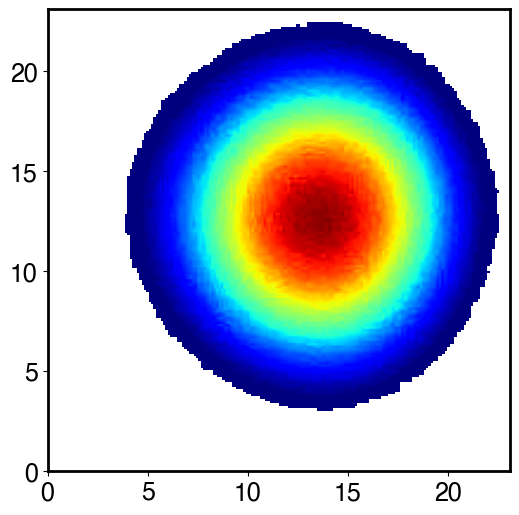

In [28]:
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
total_counts = img_matrix.sum()
print(total_counts)
#img_matrix[img_matrix==0]=np.nan
plt.imshow(img_matrix[35:230,35:230], cmap='jet', aspect=1,origin='lower',vmin=10
           ,extent=[0,200*DP_ratio,0,200*DP_ratio])

ticks = np.arange(0,25,5)
plt.xticks(ticks)
plt.yticks(ticks)
#plt.colorbar()
#plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')
fig_post_def(xlabel="distance (mm)",ylabel="distance (mm)",xlim=(0,25),ylim=(0,25),
            x_ma=5,x_mi=2.5,
            y_ma=5,y_mi=2.5)
ax.get_legend().remove()


In [25]:
print(DP_ratio)

0.11538


In [26]:
print(ROI_half_len_array)

10


1077369.0
Ratio_1:  0.6418450874305832  point_1:  (111, 131, 117, 137)
Ratio_2:  0.7615143929331548  point_2:  (111, 131, 137, 157)
Ratio_3:  0.682982339384185  point_3:  (111, 131, 157, 177)
Ratio_4:  0.7380646742202532  point_4:  (131, 151, 117, 137)
Ratio_5:  0.8505906518565134  point_5:  (131, 151, 137, 157)
Ratio_6:  0.7801523897568985  Point_6:  (131, 151, 157, 177)
Ratio_7:  0.654542686860305  Point_7:  (151, 171, 117, 137)
Ratio_8:  0.772415022151185  Point_8:  (151, 171, 137, 157)
Ratio_9:  0.7029420746280987  Point_9:  (151, 171, 157, 177)


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_54976/3308974688.py:8: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')


Text(0, 0.5, 'pixel')

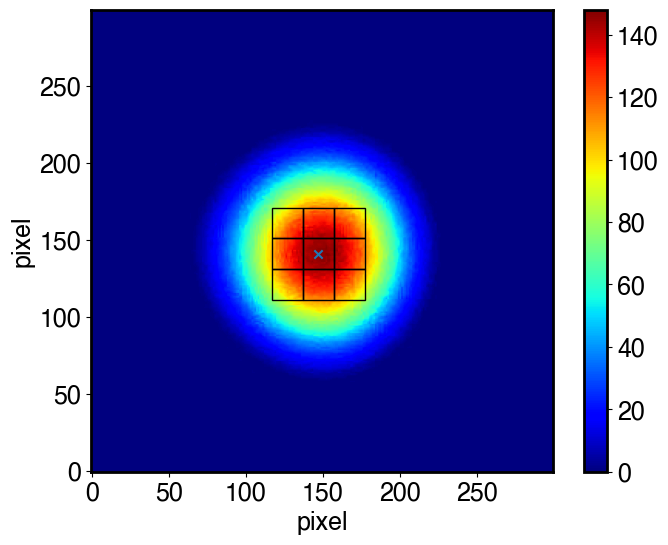

In [27]:
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
total_counts = img_matrix.sum()
print(total_counts)

plt.imshow(img_matrix, cmap='jet', aspect=1,origin='lower')
plt.colorbar()
plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')



point_1 = (cx-3*ROI_half_len_array,
cx-1*ROI_half_len_array,
cy-3*ROI_half_len_array,
cy-1*ROI_half_len_array)


Area_sum_1 =img_matrix[point_1[0]:point_1[1],point_1[2]:point_1[3]].sum()
print('Ratio_1: ', 100*(Area_sum_1/total_counts)/(2*ROI_half_len)**2,' point_1: ',point_1)
rect_1 = plt.Rectangle((plot_cx-3*ROI_half_len_array,plot_cy-3*ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_1)

point_2 = (cx-3*ROI_half_len_array,
cx-1*ROI_half_len_array,
cy-1*ROI_half_len_array,
cy+1*ROI_half_len_array)

Area_sum_2 =img_matrix[point_2[0]:point_2[1],point_2[2]:point_2[3]].sum()
print('Ratio_2: ', 100*(Area_sum_2/total_counts)/(2*ROI_half_len)**2,' point_2: ',point_2)
rect_2 = plt.Rectangle((plot_cx-ROI_half_len_array,plot_cy-3*ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_2)

point_3 = (cx-3*ROI_half_len_array,
cx-1*ROI_half_len_array,
cy+1*ROI_half_len_array,
cy+3*ROI_half_len_array)

Area_sum_3 =img_matrix[point_3[0]:point_3[1],point_3[2]:point_3[3]].sum()
print('Ratio_3: ', 100*(Area_sum_3/total_counts)/(2*ROI_half_len)**2,' point_3: ',point_3)
#print(left_4,right_4,upper_4,lower_4)
rect_3 = plt.Rectangle((plot_cx+ROI_half_len_array,plot_cy-3*ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_3)

point_4 = (cx-1*ROI_half_len_array,
cx+1*ROI_half_len_array,
cy-3*ROI_half_len_array,
cy-1*ROI_half_len_array)

Area_sum_4 =img_matrix[point_4[0]:point_4[1],point_4[2]:point_4[3]].sum()

print('Ratio_4: ', 100*(Area_sum_4/total_counts)/(2*ROI_half_len)**2,' point_4: ',point_4)
#print(left_5,right_5,upper_5,lower_5)
rect_4 = plt.Rectangle((plot_cx-3*ROI_half_len_array,plot_cy-1*ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_4)

point_5 = (cx-1*ROI_half_len_array,
cx+1*ROI_half_len_array,
cy-1*ROI_half_len_array,
cy+1*ROI_half_len_array)

Area_sum_5 =img_matrix[point_5[0]:point_5[1],point_5[2]:point_5[3]].sum()
print('Ratio_5: ', 100*(Area_sum_5/total_counts)/(2*ROI_half_len)**2,' point_5: ',point_5)
rect_5 = plt.Rectangle((plot_cx-ROI_half_len_array,plot_cy-ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_5)


point_6 = (cx-1*ROI_half_len_array,
cx+1*ROI_half_len_array,
cy+1*ROI_half_len_array,
cy+3*ROI_half_len_array)

Area_sum_6 =img_matrix[point_6[0]:point_6[1],point_6[2]:point_6[3]].sum()
print('Ratio_6: ', 100*(Area_sum_6/total_counts)/(2*ROI_half_len)**2,' Point_6: ',point_6)
rect_6 = plt.Rectangle((plot_cx+ROI_half_len_array,plot_cy-ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_6)

point_7 = (cx+1*ROI_half_len_array,
cx+3*ROI_half_len_array,
cy-3*ROI_half_len_array,
cy-1*ROI_half_len_array)

Area_sum_7 =img_matrix[point_7[0]:point_7[1],point_7[2]:point_7[3]].sum()
print('Ratio_7: ', 100*(Area_sum_7/total_counts)/(2*ROI_half_len)**2,' Point_7: ',point_7)
rect_7 = plt.Rectangle((plot_cx-3*ROI_half_len_array,plot_cy+ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_7)

point_8 = (cx+1*ROI_half_len_array,
cx+3*ROI_half_len_array,
cy-1*ROI_half_len_array,
cy+1*ROI_half_len_array)

Area_sum_8 =img_matrix[point_8[0]:point_8[1],point_8[2]:point_8[3]].sum()
print('Ratio_8: ', 100*(Area_sum_8/total_counts)/(2*ROI_half_len)**2,' Point_8: ',point_8)
rect_8 = plt.Rectangle((plot_cx-1*ROI_half_len_array,plot_cy+ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_8)

point_9 = (cx+1*ROI_half_len_array,
cx+3*ROI_half_len_array,
cy+1*ROI_half_len_array,
cy+3*ROI_half_len_array)

Area_sum_9 =img_matrix[point_9[0]:point_9[1],point_9[2]:point_9[3]].sum()
print('Ratio_9: ', 100*(Area_sum_9/total_counts)/(2*ROI_half_len)**2,' Point_9: ',point_9)
rect_9 = plt.Rectangle((plot_cx+1*ROI_half_len_array,plot_cy+ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_9)

plt.xlabel('pixel',fontsize=18)
plt.ylabel('pixel',fontsize=18)


In [174]:
3.5/DP_ratio

30.33454671520194

In [175]:
import matplotlib.ticker as ticker

1077369.0
Ratio_1:  6.585049319221177  point_1:  (111, 171, 117, 177)
123.16888888888889   14.9745646899775
12.157749270179835


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_20869/3242956162.py:8: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')


Text(0, 0.5, 'y position (mm)')

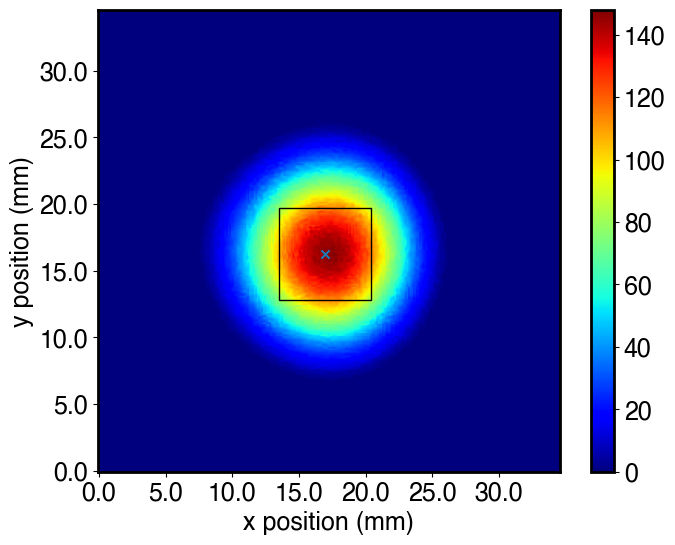

In [177]:
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
total_counts = img_matrix.sum()
print(total_counts)

plt.imshow(img_matrix, cmap='jet', aspect=1,origin='lower')
plt.colorbar()
plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')
ROI_half_len_array = 30
point_1 = (cx-1*ROI_half_len_array,
cx+1*ROI_half_len_array,
cy-1*ROI_half_len_array,
cy+1*ROI_half_len_array)

Area_sum_1 =img_matrix[point_1[0]:point_1[1],point_1[2]:point_1[3]].sum()

print('Ratio_1: ', 100*(Area_sum_1/total_counts)/(2*ROI_half_len)**2,' point_1: ',point_1)
avg = np.average(img_matrix[point_1[0]:point_1[1],point_1[2]:point_1[3]])
std = img_matrix[point_1[0]:point_1[1],point_1[2]:point_1[3]].std()
print(avg," ", std)
print(100*(std/avg))


rect_1 = plt.Rectangle((plot_cx-1*ROI_half_len_array,plot_cy-1*ROI_half_len_array),2*ROI_half_len_array,2*ROI_half_len_array,linewidth = 1,facecolor= 'None',edgecolor='black')
ax.add_patch(rect_1)

formatter = lambda x, pos: x * DP_ratio  # 0.5 is the resolution

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5/DP_ratio))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{y:,.0f}'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5/DP_ratio))
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)

ax.set_xlabel('x position (mm)',fontsize=18)
ax.set_ylabel('y position (mm)',fontsize=18)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1077369.0


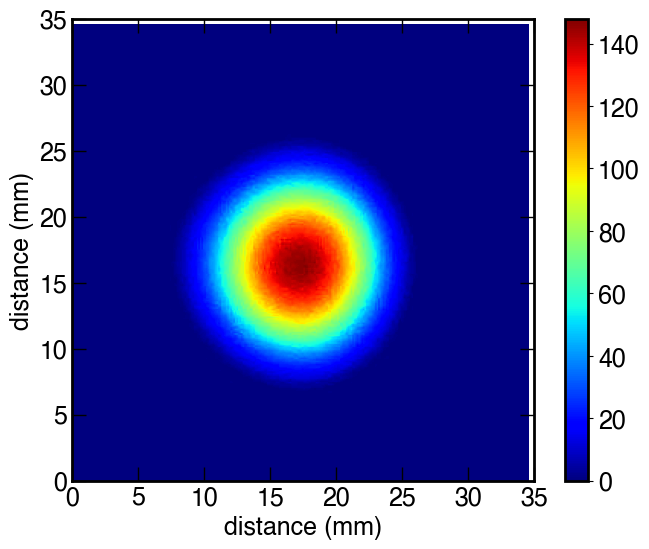

In [178]:
fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
total_counts = img_matrix.sum()
print(total_counts)
#img_matrix[img_matrix==0]=np.nan
plt.imshow(img_matrix[0:300,0:300], cmap='jet', aspect=1,origin='lower',vmin=0,extent=[0,300*DP_ratio,0,300*DP_ratio])

ticks = np.arange(0,40,5)
plt.xticks(ticks)
plt.yticks(ticks)
plt.colorbar()
#plt.scatter(plot_cx,plot_cy,marker = 'x',edgecolors = 'blue')
plt.xlabel("pixel",fontsize=18)
plt.ylabel("pixel",fontsize=18)
fig_post_def(xlabel="distance (mm)",ylabel="distance (mm)")
ax.get_legend().remove()


In [69]:
fig = plt.figure(figsize=(8,6))   
patches = []

polygon= plt.Rectangle((cx,cy),r,r,color='red')
patches.append(polygon)
plt.show()

NameError: name 'r' is not defined

<Figure size 576x432 with 0 Axes>

In [70]:
total_current = 50# nA
area_current = total_current*(Area_sum/total_counts)
area= (2*area_a)**2

area_current_norm = area_current/area
print(area_current_norm)


NameError: name 'Area_sum' is not defined

In [224]:
0.008408*200

1.6816000000000002

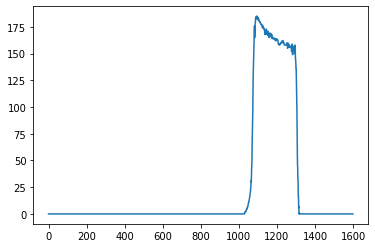

In [45]:
plt.plot(gray_img[cy,:])

In [30]:
print(contours)

[array([[[1074,  664]]], dtype=int32), array([[[1066,  560]]], dtype=int32), array([[[1056,  415]]], dtype=int32), array([[[1066,  186]],

       [[1066,  187]],

       [[1066,  188]],

       [[1066,  187]]], dtype=int32), array([[[364, 108]],

       [[365, 109]],

       [[366, 110]],

       [[366, 109]],

       [[366, 108]],

       [[365, 108]]], dtype=int32), array([[[1076,   26]],

       [[1076,   27]],

       [[1076,   28]],

       [[1076,   29]],

       [[1076,   30]],

       [[1076,   31]],

       [[1076,   30]],

       [[1076,   29]],

       [[1076,   28]],

       [[1076,   27]]], dtype=int32), array([[[1088,   18]],

       [[1087,   19]],

       [[1086,   19]],

       ...,

       [[1091,   19]],

       [[1090,   18]],

       [[1089,   18]]], dtype=int32)]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('20210701-5nA.jpg')


(1200, 1600, 3)


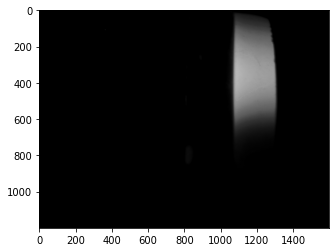

In [3]:
imgplot = plt.imshow(img)
print(img.shape)

(700, 400)


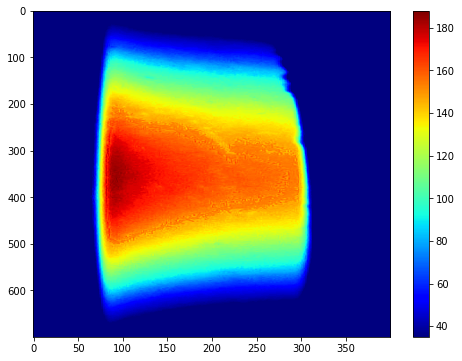

In [4]:
fig = plt.figure(figsize=(8,6))        # 圖片大小

img_matrix=img[0:700,1000:1400,2]
img_matrix = img_matrix.astype(np.float)

imgplot = plt.imshow(img_matrix, vmin=35, vmax=188, cmap='jet', aspect='auto')
plt.colorbar()
print(img_matrix.shape)
plt.savefig('colorbar.svg', format="svg")